In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [372]:
df = pd.read_csv('data2.csv')

In [373]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [374]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [375]:
df.shape

(107, 2)

In [376]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [377]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [378]:
df.drop(106, axis=0, inplace=True)

In [379]:
df.drop(105, axis=0, inplace=True)

In [380]:
df.shape

(105, 2)

In [381]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [382]:
df['Month'] = pd.to_datetime(df['Month'])

In [383]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [393]:
from datetime import datetime
df['Month'] = pd.to_datetime(df['Month'])
df.head()
df.tail(30)


,Month,Sales
75,1970-04-01,3740.0
76,1970-05-01,2927.0
77,1970-06-01,3986.0
78,1970-07-01,4217.0
79,1970-08-01,1738.0
80,1970-09-01,5221.0
81,1970-10-01,6424.0
82,1970-11-01,9842.0
83,1970-12-01,13076.0
84,1971-01-01,3934.0


In [295]:
df.set_index('Month', inplace=True)

KeyError: "None of ['Month'] are in the columns"

In [241]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [242]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

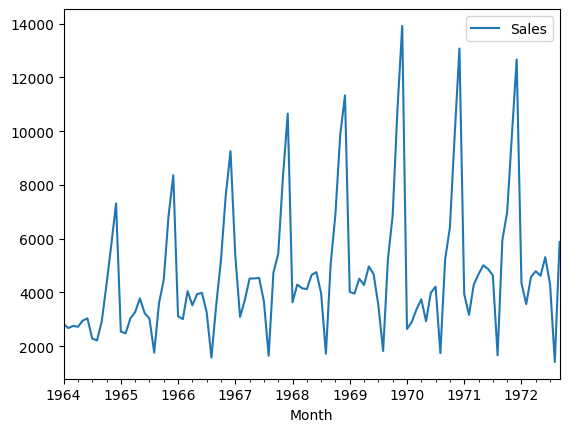

In [243]:
df.plot()

In [244]:
adfuller(df['Sales'])

(-1.833593056327623,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [245]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['ADF test statistics', 'p-value', 'Lags used', 'Number of obs used']
    
    for value, label in zip(result, labels):
        print('{} : {} '.format(label, value))
        
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis, reject the null hypothesis and data is stationary')
    else:
        print('Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary')

In [246]:
adfuller_test(df['Sales'])

ADF test statistics : -1.833593056327623 
p-value : 0.363915771660245 
Lags used : 11 
Number of obs used : 93 
Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary


In [247]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [248]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [249]:
df['Sales first diff.'] = df['Sales'] - df['Sales'].shift(1)

In [250]:
df.head()

,Sales,Sales first diff.
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [251]:
df['Seasonal first diff.'] = df['Sales'] - df['Sales'].shift(12)

In [252]:
df.head()

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [253]:
adfuller_test(df['Seasonal first diff.'].dropna())

ADF test statistics : -7.626619157213164 
p-value : 2.060579696813685e-11 
Lags used : 0 
Number of obs used : 92 
Strong evidence against null hypothesis, reject the null hypothesis and data is stationary


<Axes: xlabel='Month'>

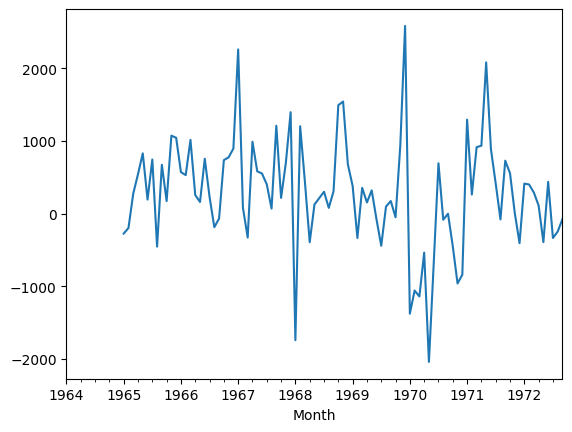

In [254]:
df['Seasonal first diff.'].plot()

In [255]:
df.head(15)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


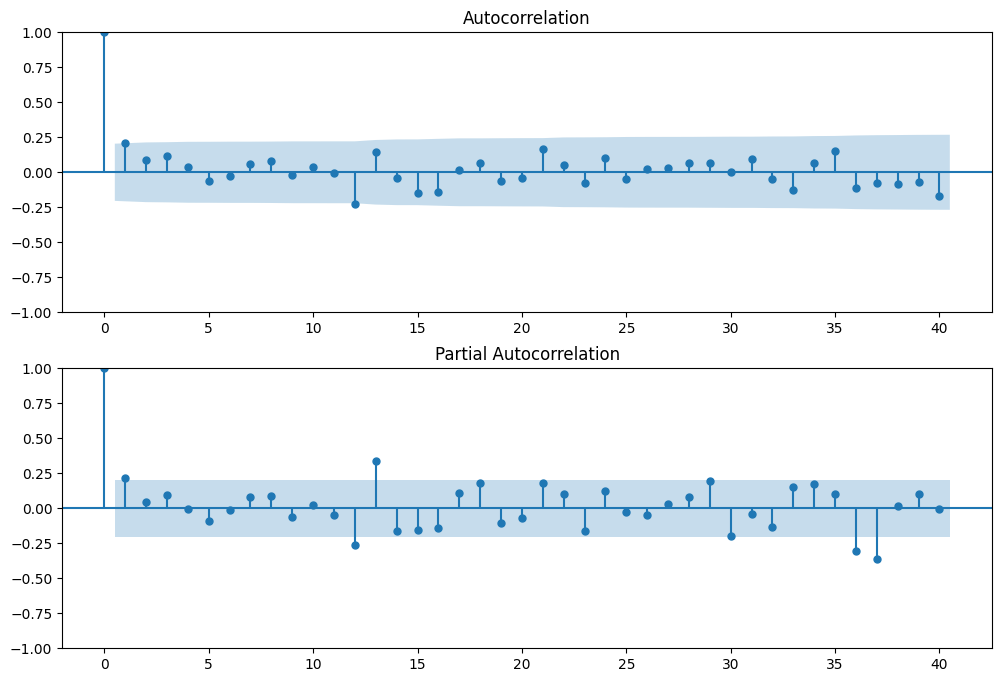

In [256]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff.'].iloc[13:], lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff.'].iloc[13:], lags=40, ax=ax2)

In [257]:
model = ARIMA(df['Sales'], order=(1,1,1))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [258]:
model = model.fit()

NameError: name 'model' is not defined

In [259]:
model.summary()

NameError: name 'model' is not defined

In [260]:
df.shape

(105, 3)

In [261]:
df['forecast'] = model.predict(start=90, end=103, dynamic=True)

NameError: name 'model' is not defined

In [303]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast_SARIMAX
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,4437.324143
1971-08-01,1659.0,-2974.0,-79.0,2050.747444
1971-09-01,5951.0,4292.0,730.0,5493.376381
1971-10-01,6981.0,1030.0,557.0,6752.039127


In [304]:
df[['Sales', 'forecast']].plot(figsize=(12,8))

KeyError: "['forecast'] not in index"

In [305]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

In [306]:
results = model.fit()

In [307]:
df['forecast_SARIMAX'] = results.predict(start=90, end=103, dynamic=True)

In [308]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast_SARIMAX
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,4437.324143
1971-08-01,1659.0,-2974.0,-79.0,2050.747444
1971-09-01,5951.0,4292.0,730.0,5493.376381
1971-10-01,6981.0,1030.0,557.0,6752.039127


<Axes: xlabel='Month'>

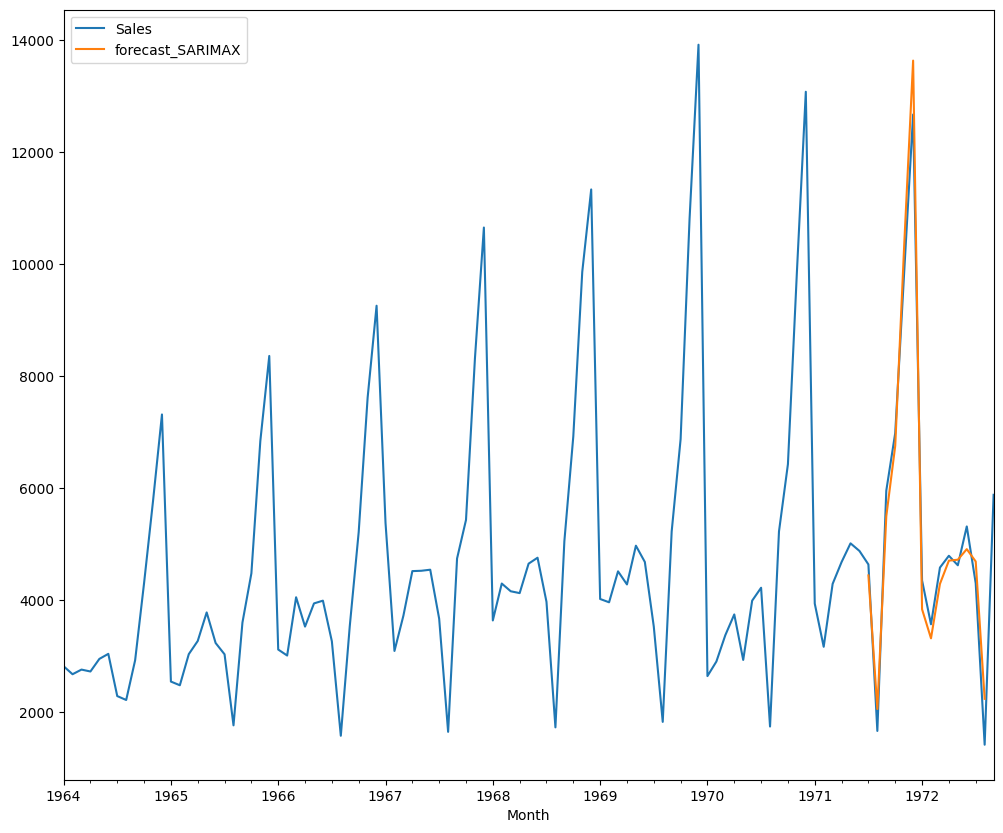

In [309]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,10))

In [344]:
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,48)]

In [345]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00'),
 Timestamp('1974-09-01 00:00:00'),
 Timestamp('1974-10-01 00:00:00'),
 Timestamp('1974-11-01 00:00:00'),
 Timestamp('1974-12-01 00:00:00'),
 Timestamp('1975-01-01 00:00:00'),
 Timestamp('1975-02-

In [346]:
future_dataset = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [347]:
future_dataset.tail()

,Sales,Sales first diff.,Seasonal first diff.,forecast_SARIMAX
1976-04-01,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN


In [348]:
future_df = pd.concat([df, future_dataset])

In [349]:
future_df.shape

(152, 4)

In [352]:
future_df['forecast_SARIMAX2'] = results.predict(start=90, end=124, dynamic=True)

<Axes: >

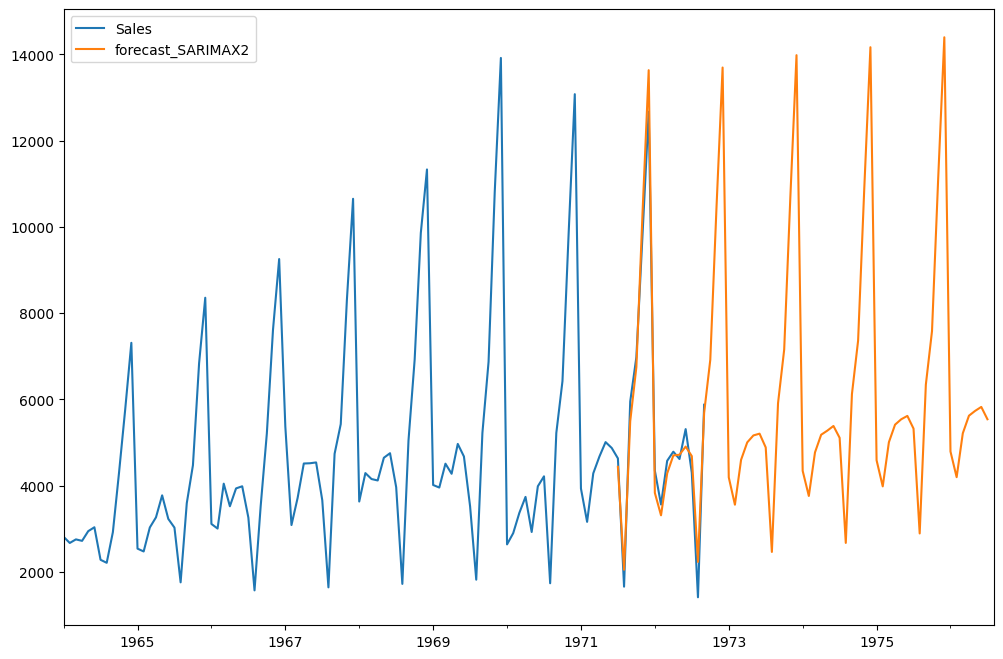

In [353]:
future_df[['Sales', 'forecast_SARIMAX2']].plot(figsize=(12,8))

The SARIMAX algorithm estimated the champagne sales for the years 1973 and 1974 as seen in the graph above.